## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Block warnings messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load biomass dataset
biomass_data = './../03_input_data/input_CHM_&_spectral_data_site2020_2024.xlsx'
df = pd.read_excel(biomass_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [4]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN'])
            
# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN
0,6.824,9.240,2260,1210,-0.731,2.576,2.33,0.445070,13,35.145074,360.273487,0.488754,0.072792
1,8.189,9.622,2700,1180,0.585,2.915,2.47,12.465903,24,36.135511,323.958625,0.501683,0.098347
2,8.380,9.589,2500,1400,0.779,2.882,2.44,13.028298,18,35.938764,299.438354,0.540056,0.187811
3,8.137,9.449,2500,1090,0.517,2.724,2.55,2.128231,15,35.908361,319.773395,0.480991,0.020686
4,7.696,9.401,2400,720,0.224,2.826,2.14,12.171553,8,38.062522,353.104284,0.505257,0.106549


# Pre-analysis of parameters

In [5]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   r_MIN          103 non-null    int64  
 9   b_STD          103 non-null    float64
 10  contr_r_STD    103 non-null    float64
 11  corr_r_Q25     103 non-null    float64
 12  corr_r_MIN     103 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 10.6 KB


In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Cs_wood", "ln_Sr_wood"].describe()

ln_Cs_wood                                                 \
                      count       mean       std     min      25%      50%   
Dominant_specias                                                             
Alder                   4.0   7.305000  1.427622   5.886   6.6765   7.0235   
Aspen                   1.0  11.367000       NaN  11.367  11.3670  11.3670   
Birch                  23.0   7.304652  1.533182   4.533   6.3365   7.2150   
Oak                     3.0   7.430333  1.260072   6.040   6.8970   7.7540   
Pine                   71.0   6.901690  1.650166   3.526   6.3790   6.9470   
Spruce                  1.0   5.176000       NaN   5.176   5.1760   5.1760   

                                  ln_Sr_wood                               \
                      75%     max      count       mean       std     min   
Dominant_specias                                                            
Alder              7.6520   9.287        4.0   7.206000  0.650057   6.265   
Aspen             11.3670  11.367        1.0  11.090000       NaN  11.090   
Birch              8.0320  10.332       23.0   9.345478  1.626360   7.139   
Oak                8.1255   8.497        3.0   7.483667  0.815040   6.565   
Pine               7.6960  10.469       71.0   8.542592  1.359020   6.075   
Spruce             5.1760   5.176        1.0   7.783000       NaN   7.783   

                                                     
                      25%      50%      75%     max  
Dominant_specias                                     
Alder              7.0255   7.4545   7.6350   7.650  
Aspen             11.0900  11.0900  11.0900  11.090  
Birch              8.4000   8.9910   9.9365  13.864  
Oak                7.1655   7.7660   7.9430   8.120  
Pine               7.6450   8.4720   9.3710  12.687  
Spruce             7.7830   7.7830   7.7830   7.783

In [7]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3440.194175,1242.902913,-0.252563,2.464709,3.570291,3.368496,11.378641,35.164575,327.115078,0.393571,0.073579
std,1.64946,1.472424,6087.580089,2037.684800,1.104610,0.904675,6.089170,4.845054,9.139568,5.338700,167.617957,0.151801,0.056017
min,3.52600,6.075000,260.000000,50.000000,-3.033000,0.391000,0.480000,-0.018586,2.000000,20.570709,0.091058,0.033797,-0.062450
25%,6.31900,7.664000,635.000000,200.000000,-0.727500,1.803000,0.710000,0.482279,5.000000,31.746440,283.887328,0.407228,0.027204
50%,6.95700,8.472000,1150.000000,400.000000,-0.025000,2.603000,1.290000,0.642883,8.000000,36.135511,353.034542,0.449670,0.063714
75%,7.91350,9.421000,2525.000000,1400.000000,0.516500,3.159000,2.960000,3.921804,15.000000,39.139044,448.017711,0.476635,0.110983
max,11.36700,13.864000,35200.000000,10500.000000,1.652000,4.659000,36.590000,17.862923,56.000000,45.825416,652.546648,0.555648,0.241284


# Selecting working columns for the XGBoost algorithms

In [8]:
# Choosing the predictor and independent variables
predictor = "ln_Cs_wood"
indep_variables = ['r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_MIN', 'corr_r_Q25', 'AEDR_mean']


In [9]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  \
0         6.824       9.240           2260           1210     -0.731   
1         8.189       9.622           2700           1180      0.585   
2         8.380       9.589           2500           1400      0.779   
3         8.137       9.449           2500           1090      0.517   
4         7.696       9.401           2400            720      0.224   
..          ...         ...            ...            ...        ...   
98        8.071       8.434           2500           1300      0.228   
99        7.993      10.042           2300           1100      0.266   
100       8.343      10.488           2400           1200      0.543   
101       3.638       6.399            630            270     -2.811   
102       4.787       6.877            680            290     -1.728   

     ln_Tag_Sr  AEDR_mean  mf_chm_MIN  r_MIN      b_STD  contr_r_STD  \
0        2.576       2.33    0.445070     13  35.145074   360.2

In [10]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [11]:
# Columns in "X" data collections
X.head()

,r_MIN,b_STD,contr_r_STD,corr_r_MIN,corr_r_Q25,AEDR_mean
0,13,35.145074,360.273487,0.072792,0.488754,2.33
1,24,36.135511,323.958625,0.098347,0.501683,2.47
2,18,35.938764,299.438354,0.187811,0.540056,2.44
3,15,35.908361,319.773395,0.020686,0.480991,2.55
4,8,38.062522,353.104284,0.106549,0.505257,2.14


In [12]:
# Columns in "y" data collections
y.head()

,ln_Cs_wood
0,6.824
1,8.189
2,8.380
3,8.137
4,7.696


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.5194430163388599, 0.6158388904320162, 0.6259108118910774]
    Mean: 0.587
    Std: 0.048

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.92529176 1.18064932 1.1639362 ]
    Mean: 1.090
    Std: 0.117

 --------------------
Mean absolute error (MAE): 

    Scores: [0.9130315884181432, 0.8262097596561208, 0.7314796147066004]
    Mean: 0.824
    Std: 0.074

 --------------------


# Add optimal hyperparameters for XGBoost model

In [17]:
# Hyperparameters data for the next step/stage
p1 = 0.37679773343911427                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.21630107231039897                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.300427594799142                    # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2                                    # max_depth
print('Max_depth: ' + str(p4))

p5 = 51                                  # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.642309491037681                   # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.37679773343911427
Gamma: 0.21630107231039897
Learning_rate: 0.300427594799142
Max_depth: 2
N_estimators: 51
Subsample: 0.642309491037681


# Estimation of predictive quality to basic XGBoost models using Loops

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:4.99259	validation_1-rmse:4.63131
[1]	validation_0-rmse:3.67451	validation_1-rmse:3.44334
[2]	validation_0-rmse:2.68572	validation_1-rmse:2.53332
[3]	validation_0-rmse:2.06846	validation_1-rmse:2.02410
[4]	validation_0-rmse:1.63755	validation_1-rmse:1.78204
[5]	validation_0-rmse:1.32967	validation_1-rmse:1.56536
[6]	validation_0-rmse:1.11859	validation_1-rmse:1.41070
[7]	validation_0-rmse:1.00089	validation_1-rmse:1.34799
[8]	validation_0-rmse:0.92318	validation_1-rmse:1.29590
[9]	validation_0-rmse:0.85102	validation_1-rmse:1.29941
[10]	validation_0-rmse:0.83683	validation_1-rmse:1.32660
[11]	validation_0-rmse:0.81802	validation_1-rmse:1.31251
[12]	validation_0-rmse:0.80109	validation_1-rmse:1.33085
[13]	validation_0-rmse:0.79290	validation_1-rmse:1.30996
[14]	validation_0-rmse:0.76227	validation_1-rmse:1.30353
[15]	validation_0-rmse:0.72569	validation_1-rmse:1.24433
[16]	validation_0-rmse:0.71396	validation_1-rmse:1.20295
[17]	validation_0-rmse:0.69736	validation

# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.612
Uncertainty
a0: 2.51+/-0.383
a1: 0.634+/-0.051


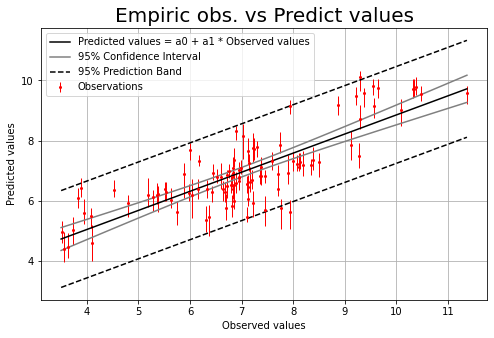

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(3.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: AEDR_mean: mean - 0.51, median - 0.507, CI - [0.447-0.571]

SHAP-values for: b_STD: mean - 0.113, median - 0.113, CI - [0.08-0.147]

SHAP-values for: contr_r_STD: mean - 0.404, median - 0.403, CI - [0.338-0.47]

SHAP-values for: corr_r_MIN: mean - 0.206, median - 0.207, CI - [0.17-0.245]

SHAP-values for: corr_r_Q25: mean - 0.244, median - 0.246, CI - [0.176-0.309]

SHAP-values for: r_MIN: mean - 0.069, median - 0.071, CI - [0.016-0.109]



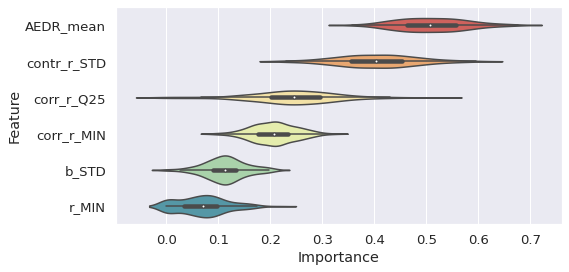

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['AEDR_mean', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN', 'b_STD', 'r_MIN'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 21.955, median: 20.0,
 pred. interval (P(0.025)-P(0.975)): 8.0-48.025, 
 conf. interval (p-value=0.95): 11.872-33.691 
***
Aggregate bias statistic: 
 mean: -0.063, median: -0.071,
 pred. interval (P(0.025)-P(0.975)): -0.573-0.345, 
 conf. interval (p-value=0.95): -0.248-0.142 
***
Aggregate RMSE statistic: 
 mean: 1.004, median: 1.006, pred. interval (P(0.025)-P(0.975)): 0.675-1.322, 
 conf. interval (p-value=0.95): 0.884-1.124 
***
Aggregate MSE statistic: 
 mean: 1.029, median: 1.012, pred. interval (P(0.025)-P(0.975)): 0.456-1.749, 
 conf. interval (p-value=0.95): 0.782-1.266 
***
Aggregate R^2 statistic: 
 mean: 0.563, median: 0.591, pred. interval (P(0.025)-P(0.975)): 0.172-0.8, 
 conf. interval (p-value=0.95): 0.403-0.707 
***
Aggregate bias(%) statistic: 
 mean: -0.832, median: -1.007, pred. interval (P(0.025)-P(0.975)): -7.995-5.034, 
 conf. interval (p-value=0.95): -3.531-

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

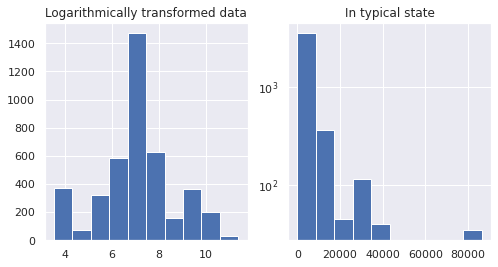

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [31]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [4, 5, 6, 7, 8, 9, 10, 11])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 500, 1000, 5000, 10000, 20000, 50000, 1000000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

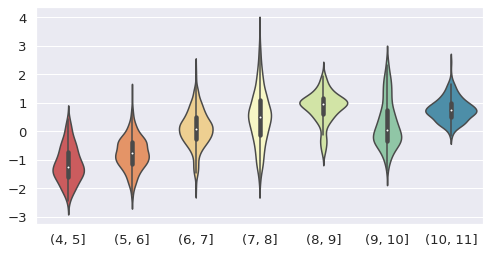

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

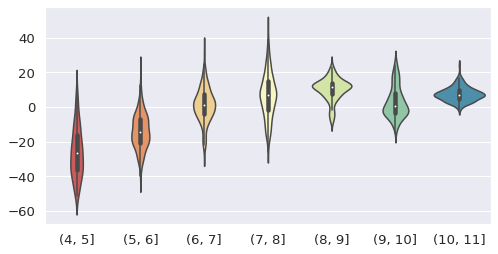

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

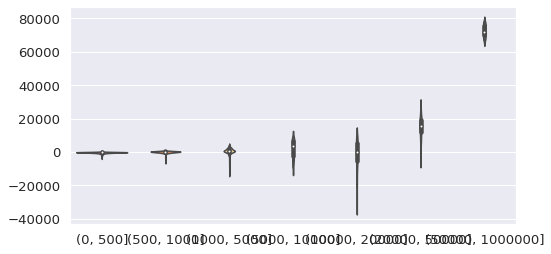

In [34]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

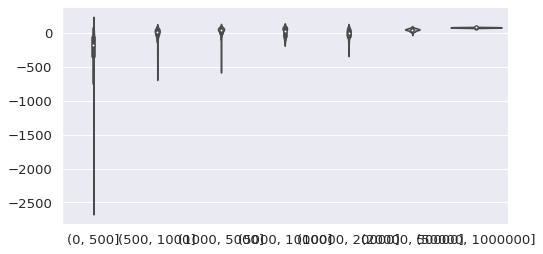

In [35]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [36]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [37]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [38]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.81533
[1]	validation_0-rmse:3.48135
[2]	validation_0-rmse:2.58239
[3]	validation_0-rmse:1.99385
[4]	validation_0-rmse:1.57330
[5]	validation_0-rmse:1.32964
[6]	validation_0-rmse:1.13661
[7]	validation_0-rmse:1.03681
[8]	validation_0-rmse:0.95461
[9]	validation_0-rmse:0.90396
[10]	validation_0-rmse:0.85432
[11]	validation_0-rmse:0.82138
[12]	validation_0-rmse:0.79865
[13]	validation_0-rmse:0.76434
[14]	validation_0-rmse:0.73518
[15]	validation_0-rmse:0.72532
[16]	validation_0-rmse:0.70891
[17]	validation_0-rmse:0.69873
[18]	validation_0-rmse:0.69463
[19]	validation_0-rmse:0.68975
[20]	validation_0-rmse:0.67837
[21]	validation_0-rmse:0.67122
[22]	validation_0-rmse:0.64879
[23]	validation_0-rmse:0.64057
[24]	validation_0-rmse:0.63588
[25]	validation_0-rmse:0.61881
[26]	validation_0-rmse:0.60309
[27]	validation_0-rmse:0.59389
[28]	validation_0-rmse:0.58722
[29]	validation_0-rmse:0.58361
[30]	validation_0-rmse:0.57807
[31]	validation_0-rmse:0.56178
[32]	validation_0-

In [39]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 50


In [40]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

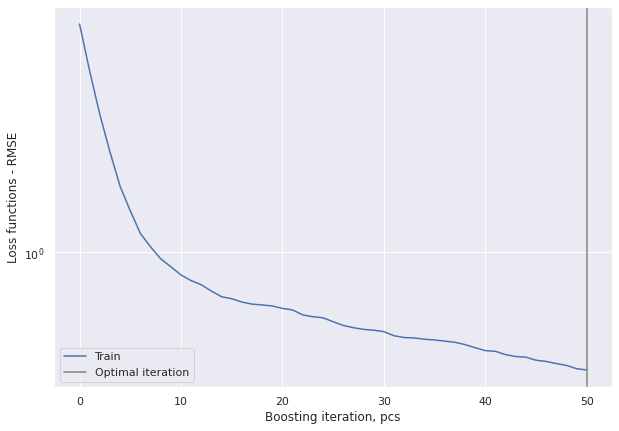

In [41]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [42]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.23
RMSE: 0.4
Relative RMSE(%):  6.294
MSE: 0.2
R square: 92.7%


In [43]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.930
Uncertainty
a0: 0.82+/-0.17
a1: 0.881+/-0.024


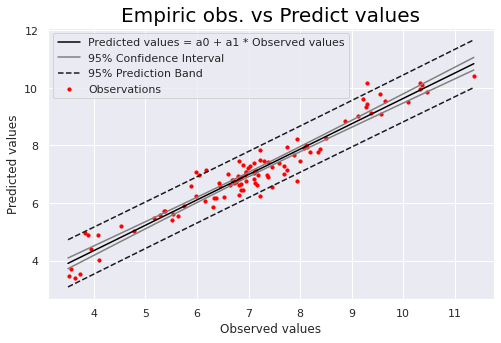

In [44]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(3.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

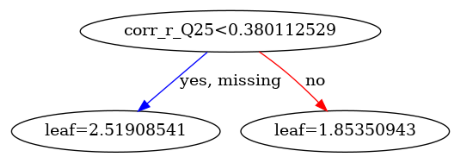

In [45]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

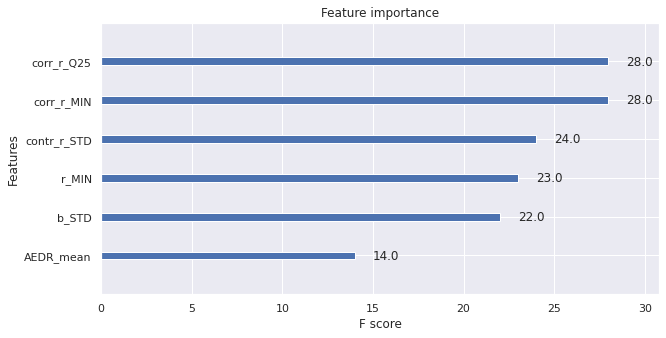

In [47]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

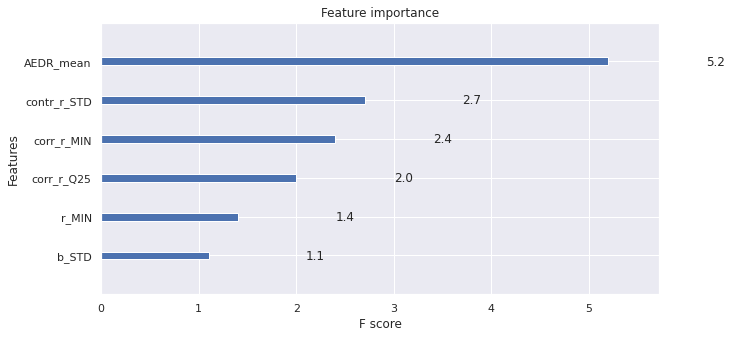

In [48]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

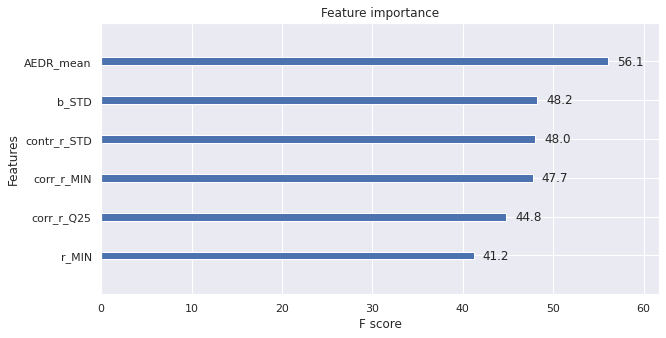

In [49]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [50]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

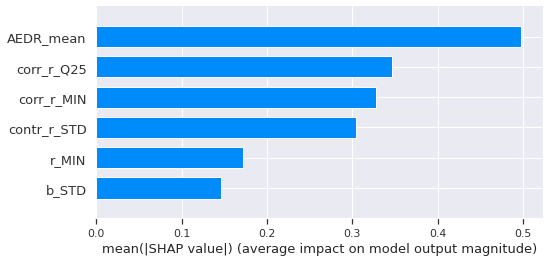

In [51]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

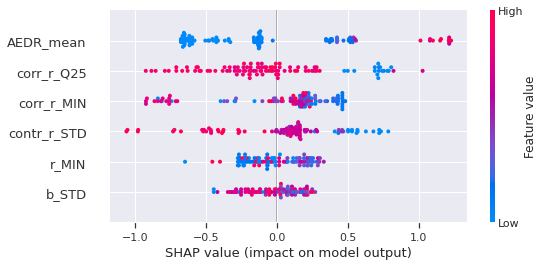

In [52]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

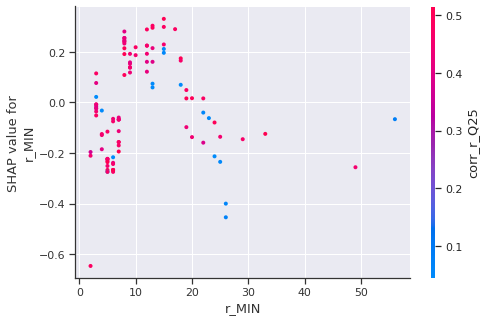

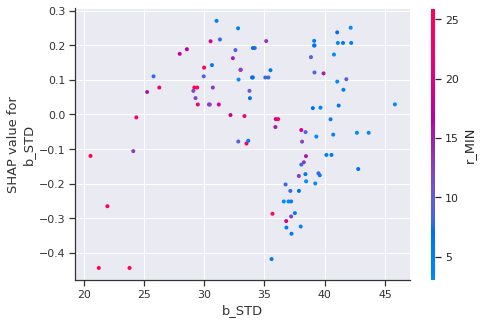

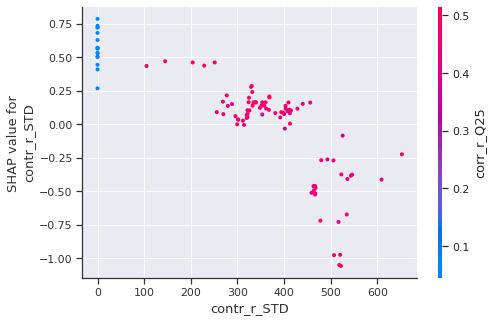

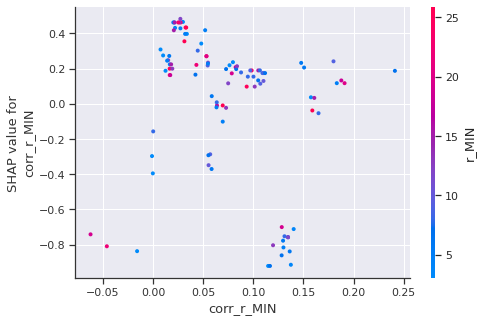

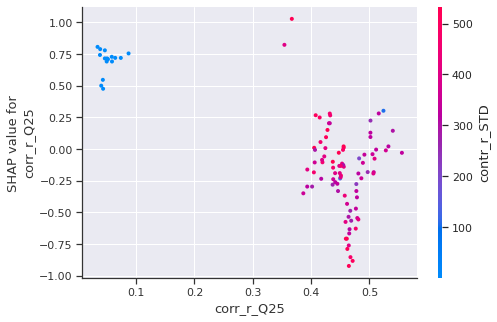

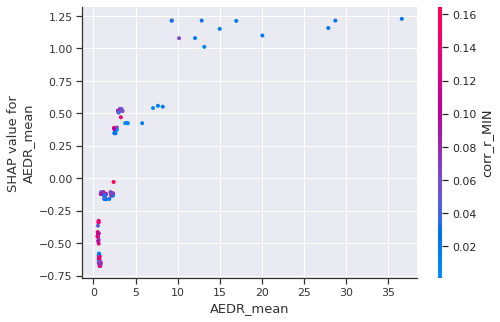

In [53]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [54]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/07_LN_Cs_vs_CHM_RGB_AEDR_XGB_model_2024_final.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/07_LN_Cs_vs_CHM_RGB_AEDR_XGB_model_2024_final.txt")